In [1]:
## Import libraries

import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go

In [2]:
## Join data table based on CU_NUMBER

file_list = glob.glob(os.path.join(os.getcwd(), 'C:\\Users\\Trang\\Desktop\\NCUA Data Jun 2021\\', '*.txt'))

df = []

for file in file_list:
    if file == file_list[0]:
        df = pd.read_csv(file)
    else:
        df_sub = pd.read_csv(file)
        df = pd.merge(df, df_sub[2:], how='left', on='CU_NUMBER')

In [3]:
## Print numbers of rows and columns

print(df.shape)
print(df.head(10))

(5136, 270)
   CU_NUMBER       CYCLE_DATE_x  JOIN_NUMBER_x      RSSD  CU_TYPE  \
0          1  6/30/2021 0:00:00              2   50377.0        1   
1          6  6/30/2021 0:00:00              7   54571.0        1   
2         12  6/30/2021 0:00:00             11   56678.0        1   
3         13  6/30/2021 0:00:00             12  861676.0        1   
4         16  6/30/2021 0:00:00             14   59277.0        1   
5         19  6/30/2021 0:00:00             16  863773.0        1   
6         22  6/30/2021 0:00:00             17   61074.0        1   
7         26  6/30/2021 0:00:00             19  866372.0        1   
8         28  6/30/2021 0:00:00             21  953375.0        1   
9         42  6/30/2021 0:00:00             29  870276.0        1   

                          CU_NAME          CITY STATE CharterState  \
0       MORRIS SHEPPARD TEXARKANA     TEXARKANA    TX          NaN   
1       THE NEW ORLEANS FIREMEN'S      METAIRIE    LA          NaN   
2                 

In [4]:
## Check data type of each attribute

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5136 entries, 0 to 5135
Data columns (total 270 columns):
 #    Column         Dtype  
---   ------         -----  
 0    CU_NUMBER      int64  
 1    CYCLE_DATE_x   object 
 2    JOIN_NUMBER_x  int64  
 3    RSSD           float64
 4    CU_TYPE        int64  
 5    CU_NAME        object 
 6    CITY           object 
 7    STATE          object 
 8    CharterState   object 
 9    STATE_CODE     int64  
 10   ZIP_CODE       object 
 11   COUNTY_CODE    int64  
 12   CONG_DIST      int64  
 13   SMSA           int64  
 14   ATTENTION_OF   object 
 15   STREET         object 
 16   REGION         int64  
 17   SE             object 
 18   DISTRICT       int64  
 19   YEAR_OPENED    int64  
 20   TOM_CODE       int64  
 21   LIMITED_INC    int64  
 22   ISSUE_DATE     object 
 23   Peer_Group     int64  
 24   Quarter_Flag   int64  
 25   CYCLE_DATE_y   object 
 26   JOIN_NUMBER_y  float64
 27   UPDATE_DATE    object 
 28   ACCT_007       f

In [5]:
pd.set_option('display.max_columns', 500)
df.describe()

,CU_NUMBER,JOIN_NUMBER_x,RSSD,CU_TYPE,STATE_CODE,COUNTY_CODE,CONG_DIST,SMSA,REGION,DISTRICT,YEAR_OPENED,TOM_CODE,LIMITED_INC,Peer_Group,Quarter_Flag,JOIN_NUMBER_y,ACCT_007,ACCT_008,ACCT_009,ACCT_010,ACCT_011C,ACCT_013,ACCT_018,ACCT_019,ACCT_021B,ACCT_022B,ACCT_023B,ACCT_025A,ACCT_025B,ACCT_031A,ACCT_031B,ACCT_041B,ACCT_042,ACCT_058C,ACCT_065,ACCT_067,ACCT_068,ACCT_069,ACCT_080,ACCT_083,ACCT_084,ACCT_100,ACCT_300,ACCT_340,ACCT_380,ACCT_386,ACCT_387,ACCT_388,ACCT_392,ACCT_400,ACCT_457,ACCT_521,ACCT_522,ACCT_523,ACCT_524,ACCT_550,ACCT_551,ACCT_552,ACCT_562,ACCT_563,ACCT_602,ACCT_630,ACCT_652A,ACCT_652B1,ACCT_652B2,ACCT_655A,ACCT_655B1,ACCT_655B2,ACCT_656C,ACCT_657,ACCT_658,ACCT_662,ACCT_668,ACCT_671,ACCT_672A,ACCT_672B1,ACCT_672B2,ACCT_703,ACCT_704,ACCT_705,ACCT_706,ACCT_707,ACCT_708,ACCT_710,ACCT_712,ACCT_713,ACCT_714,ACCT_715,ACCT_716,ACCT_718,ACCT_719,ACCT_720,ACCT_721,ACCT_722,ACCT_723,ACCT_724,ACCT_730,ACCT_741A,ACCT_741B1,ACCT_741B2,ACCT_742A,ACCT_742B1,ACCT_742B2,ACCT_746A,ACCT_746B1,ACCT_746B2,ACCT_749,ACCT_750A,ACCT_750B1,ACCT_750B2,ACCT_751,ACCT_755,ACCT_760C,ACCT_761C,ACCT_771,ACCT_775,ACCT_794,ACCT_798,ACCT_799A,ACCT_799B1,ACCT_799B2,ACCT_825,ACCT_860C,ACCT_880,ACCT_902,ACCT_906A,ACCT_908A,ACCT_908C,ACCT_911,ACCT_931,ACCT_940,ACCT_959,ACCT_960,ACCT_968,ACCT_973,ACCT_975,ACCT_976,ACCT_991,Acct_965A,Acct_965B,Acct_965C,Acct_965D,ACCT_020A,ACCT_020B,ACCT_024A,ACCT_024B,ACCT_042A,ACCT_090A,ACCT_090B,ACCT_090C,ACCT_090D,ACCT_099A,ACCT_143A,ACCT_143B,ACCT_143C,ACCT_143D,ACCT_400A,ACCT_400B,ACCT_400C,ACCT_400D,ACCT_400F,ACCT_459A,ACCT_463A,ACCT_475A,ACCT_475B,ACCT_475C,ACCT_475D,ACCT_691B,ACCT_691C,ACCT_692,ACCT_692A,ACCT_704A,ACCT_704B,ACCT_704C,ACCT_704D,ACCT_704E,ACCT_705A,ACCT_705B,ACCT_708B,ACCT_720A,ACCT_720B,ACCT_720C,ACCT_720D,ACCT_720E,ACCT_721A,ACCT_721B,ACCT_724B,ACCT_733A,ACCT_745C1,ACCT_745C2,ACCT_796C1,ACCT_796C2,ACCT_797C1,ACCT_797C2,ACCT_799C1,ACCT_799C2,ACCT_965C1,ACCT_965C2,ACCT_088,ACCT_799A1,ACCT_672B,ACCT_672C1,ACCT_672C2,ACCT_672D,ACCT_744B,ACCT_744C1,ACCT_744C2,ACCT_744D,ACCT_652B,ACCT_652C1,ACCT_652C2,ACCT_652D,ACCT_766A,ACCT_766B,ACCT_766C1,ACCT_766C2,ACCT_766D,ACCT_766E,ACCT_798A1,ACCT_798A2,ACCT_798A3,ACCT_009A,ACCT_009B,ACCT_009C,ACCT_769A1,ACCT_769B1,ACCT_616,ACCT_616A,ACCT_704A1,ACCT_704C1,ACCT_980,ACCT_742C1,ACCT_742C2,ACCT_020J,ACCT_020K,ACCT_020L,ACCT_021J,ACCT_021K,ACCT_021L,ACCT_022J,ACCT_022K,ACCT_022L,ACCT_023J,ACCT_023K,ACCT_023L,ACCT_041J,ACCT_041K,ACCT_041L,Acct_1019,Acct_1019A,Acct_1019B,Acct_1019C,Acct_1019D,Acct_1019E,Acct_789A,Acct_789A1,Acct_789B,Acct_789B1
count,5136.000000,5136.000000,5.134000e+03,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.0,5134.000000,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5134.0,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5134.0,5.134000e+03,5134.0,5134.0,5134.0,5134.0,5134.0,5.134000e+03,5.134000e+03,5134.0,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5134.0,5134.0,5134.0,5.134000e+03,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5.134000e+03,5.134000e+03,5134.000000,5134.0,5134.0,5.134000e+03,5.134000e+03,5.134000e+03,5134.0,5134.0,5134.0,5134.0,5134.0,5134.0,5.134000e+03,5.134000e+03,5134.0,5.134000e+03,5.134000e+03,5.134000e+03,5134.0,5134.0,5.134000e+03,5134.0,5134.0,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5134.0,5134.0,5134.0,5134.0,5.134000e+03,5.134000e+03,5134.0,5134.0,5.134000e+03,5.134000e+03,5.134000e+03,5134.0,5134.0,5134.0,5134.0,5134.0,5134.0,5134.0,5134.0,5134.0,5134.0,5134.0,5134.0,5134.0,5134.0,5.134000e+03,5.134000e+03,5134.0,5134.0,5.134000e+03,5.134000e+03,5.134000e+03,5134.0,5134.0,5134.0,5134.0,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5134.0,5134.0,5134.000000,5134.0,5134.000000,5134.000000,5134.0,5134

At first glance, the dataset contains multiple columns with zero value and thus should be removed. In addition, the first two rows of the dataset doesn't contain meaningful values either (too much NaN) so I will remove them as well.

In [6]:
## Clean dataset

df = df.loc[2:, :] # Remove 2 first rows
df = df.loc[:, (df != 0).any(axis=0)] # Remove columns with 0 values
print(df.shape)
print(df.head(10))

(5134, 153)
    CU_NUMBER       CYCLE_DATE_x  JOIN_NUMBER_x      RSSD  CU_TYPE  \
2          12  6/30/2021 0:00:00             11   56678.0        1   
3          13  6/30/2021 0:00:00             12  861676.0        1   
4          16  6/30/2021 0:00:00             14   59277.0        1   
5          19  6/30/2021 0:00:00             16  863773.0        1   
6          22  6/30/2021 0:00:00             17   61074.0        1   
7          26  6/30/2021 0:00:00             19  866372.0        1   
8          28  6/30/2021 0:00:00             21  953375.0        1   
9          42  6/30/2021 0:00:00             29  870276.0        1   
10         47  6/30/2021 0:00:00             30  957579.0        1   
11         48  6/30/2021 0:00:00             31  955472.0        1   

                           CU_NAME          CITY STATE CharterState  \
2                   FRANKLIN TRUST      HARTFORD    CT          NaN   
3                   EFCU FINANCIAL   BATON ROUGE    LA          NaN   
4   

In [7]:
pd.set_option('display.max_columns', 500)
df.describe()

,CU_NUMBER,JOIN_NUMBER_x,RSSD,CU_TYPE,STATE_CODE,COUNTY_CODE,CONG_DIST,SMSA,REGION,DISTRICT,YEAR_OPENED,TOM_CODE,LIMITED_INC,Peer_Group,JOIN_NUMBER_y,ACCT_007,ACCT_008,ACCT_009,ACCT_010,ACCT_011C,ACCT_013,ACCT_018,ACCT_021B,ACCT_022B,ACCT_023B,ACCT_025A,ACCT_025B,ACCT_031A,ACCT_031B,ACCT_041B,ACCT_058C,ACCT_083,ACCT_084,ACCT_300,ACCT_340,ACCT_380,ACCT_386,ACCT_400,ACCT_457,ACCT_521,ACCT_522,ACCT_523,ACCT_524,ACCT_550,ACCT_551,ACCT_552,ACCT_602,ACCT_630,ACCT_652A,ACCT_657,ACCT_658,ACCT_668,ACCT_671,ACCT_672A,ACCT_703,ACCT_706,ACCT_707,ACCT_708,ACCT_710,ACCT_712,ACCT_718,ACCT_719,ACCT_722,ACCT_723,ACCT_724,ACCT_751,ACCT_755,ACCT_771,ACCT_775,ACCT_794,ACCT_825,ACCT_860C,ACCT_880,ACCT_902,ACCT_906A,ACCT_908A,ACCT_908C,ACCT_911,ACCT_931,ACCT_940,ACCT_968,ACCT_975,ACCT_976,ACCT_020A,ACCT_020B,ACCT_024A,ACCT_024B,ACCT_400A,ACCT_704A,ACCT_704B,ACCT_704C,ACCT_704D,ACCT_704E,ACCT_705A,ACCT_705B,ACCT_708B,ACCT_720A,ACCT_720B,ACCT_720C,ACCT_720D,ACCT_720E,ACCT_721A,ACCT_721B,ACCT_724B,ACCT_733A,ACCT_799C1,ACCT_799C2,ACCT_088,ACCT_799A1,ACCT_672B,ACCT_672C1,ACCT_672C2,ACCT_672D,ACCT_744B,ACCT_744C1,ACCT_744C2,ACCT_744D,ACCT_652B,ACCT_652C1,ACCT_652C2,ACCT_652D,ACCT_766A,ACCT_766B,ACCT_766C1,ACCT_766C2,ACCT_766D,ACCT_766E,ACCT_798A1,ACCT_798A2,ACCT_798A3,ACCT_009A,ACCT_009B,ACCT_009C,ACCT_769A1,ACCT_769B1,ACCT_616,ACCT_616A,ACCT_704C1,ACCT_980,ACCT_742C1,ACCT_742C2
count,5134.000000,5134.000000,5.132000e+03,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5.134000e+03,5.134000e+03,5134.000000,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5134.000000,5134.000000,5134.000000,5134.000000,5.134000e+03,5134.000000,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5134.000000,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5134.000000,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5134.000000,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03,5.134000e+03
mean,33451.537398,11041.711726,5.948714e+05,1.409038,30.270354,87.959096,8.396767,6913.507596,1.960070,5.743085,1939.376510,54.103428,0.518115,3.691079,11041.711726,5.582211e+06,1.297858e+06,8.110369e+06,3.893973e+08,3.433521e+06,3.356760e+08,3.377947e+08,6.768880e+05,1.854996e+05,2.070780e+05,1.460307e+04,2.348287e+08,4.378487e+03,7.558168e+07,1.069466e+06,2.519499e+05,2.504021e+04,8.458727e+05,1.316911e+05,8.815174e+04,6.768394e+05,1.619811e+07,1.944364e+07,86.698091,661.928361,1074.979495,359.262466,468.256739,4.900314e+05,1.703048e+05,16.551545,6.633315e+05,3.283785e+06,4.111489e+05,1.235653e+08,4.736851e+06,1.744101e+03,5.244861e+06,6.017684e+05,1.056221e+08,4.534931e+06,5.564156e+05,1.067617e+07,1.218202e+08,2.938625e+07,1.736874e+07,2.349423e+06,7.439523e+05,7.953569e+04,3.185856e+06,1.270187e+05,

The dataset looks better. We now look at the description of the columns and decide which one to keep for further analysis: CU_NUMBER, STATE, TOTAL_ASSETS, NO_SHARES, TOTAL_LOANS, NO_MEMBERS, NET_INCOME

In [8]:
df = df.loc[:, ['CU_NUMBER', 'CU_NAME', 'STATE', 'ACCT_010', 'ACCT_013', 'ACCT_025B', 'ACCT_083', 'ACCT_602']]
df.rename(columns={'CU_NUMBER': 'cu_number', 'CU_NAME': 'name', 'STATE': 'state',
                   'ACCT_010': 'total_assets', 'ACCT_013': 'no_of_shares', 'ACCT_025B': 'total_loans',
                   'ACCT_083': 'no_of_members', 'ACCT_602': 'net_income'}, inplace=True)

In [9]:
df['roa'] = df['net_income'] / df['total_assets']

## Convert unit to million

df['total_assets'] = df['total_assets'] / 1000000 
df['total_loans'] = df['total_loans'] / 1000000
df['net_income'] = df['net_income'] / 1000000

In [26]:
df.head(10)

,cu_number,name,state,total_assets,no_of_shares,total_loans,no_of_members,net_income,roa
2,12,FRANKLIN TRUST,CT,61.586661,59174933.0,21.737111,9311.0,0.000000,0.000000
3,13,EFCU FINANCIAL,LA,687.533643,570374663.0,558.347754,53556.0,0.000000,0.000000
4,16,WOODMEN,NE,10.047513,8780405.0,3.650277,1023.0,0.000000,0.000000
5,19,NEW HAVEN TEACHERS,CT,10.300248,7475998.0,0.968374,1210.0,0.000000,0.000000
6,22,WATERBURY CONNECTICUT TEACHERS,CT,302.932316,262927686.0,199.548740,19760.0,0.000000,0.000000
7,26,FARMERS,FL,19.838054,17716389.0,5.446450,1318.0,-0.005412,-0.000273
8,28,CENTRIS,NE,989.657707,847486710.0,779.044257,117191.0,0.000000,0.000000
9,42,FD COMMUNITY,CT,118.288093,107856222.0,60.299919,9898.0,0.000000,0.000000
10,47,FARGO PUBLIC SCHOOLS,ND,53.368400,47019484.0,20.576387,2386.0,0.000000,0.000000
11,48,EAGLE EXPRESS,MS,65.031849,52908172.0,21.269083,4111.0,0.000000,0.000000


In [11]:
df.describe()

,cu_number,total_assets,no_of_shares,total_loans,no_of_members,net_income,roa
count,5134.000000,5134.000000,5.134000e+03,5134.000000,5.134000e+03,5134.000000,5134.000000
mean,33451.537398,389.397259,3.356760e+08,234.828747,2.504021e+04,0.663331,0.000026
std,27437.506823,2502.703732,2.102548e+09,1498.855774,1.694374e+05,4.913427,0.052862
min,12.000000,0.021259,0.000000e+00,0.000000,1.000000e+00,-1.641777,-3.556275
25%,9615.250000,12.490294,1.049955e+07,4.735176,1.411000e+03,0.000000,0.000000
50%,21426.500000,47.519400,4.169776e+07,20.816336,3.902500e+03,0.000000,0.000000
75%,63858.250000,184.679724,1.609698e+08,100.811650,1.396500e+04,0.036847,0.001703
max,97111.000000,147898.793565,1.223759e+11,89115.973568,1.057795e+07,146.927611,0.116415


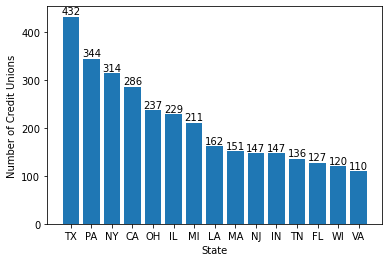

In [12]:
## Plot 15 states with the most number of credit unions

state_rank = df.groupby('state').size().sort_values(ascending=False)
plt.bar(state_rank.index[:15], state_rank[:15])
plt.xlabel('State')
plt.ylabel('Number of Credit Unions')
for index, value in enumerate(state_rank[:15]):
    plt.text(index, value + 5, str(value), ha='center')
plt.show()

In [14]:
## Define asset category

ranges = [0, 2, 5, 10, 20, 50, 100, 150, 250, 350, 450, 650, 850, 1000, 2000, 4000, 147900]
index = ['Under $2M', '$2M - < $5M', '$5M - < $10M', '$10M - < $20M', '$20M - < $50M', '$50M - < $100M', '$100M - < $150M',
        '$150M - < $250M', '$250M - < $350M', '$350M - < $450M', '$450M - < $650M', '$650M - < $850M', '$850M - < $1B',
        '$1B - < $2B', '$2B - < $4B', 'Over $4B']
cu_count = df['total_assets'].groupby(pd.cut(df['total_assets'], ranges)).count()
cu_assets_sum = df['total_assets'].groupby(pd.cut(df['total_assets'], ranges)).sum()
cu_loans = df['total_loans'].groupby(pd.cut(df['total_loans'], ranges)).sum()

In [15]:
## Set label to index of list

cu_count.index = index
cu_assets_sum.index = index
cu_loans.index = index

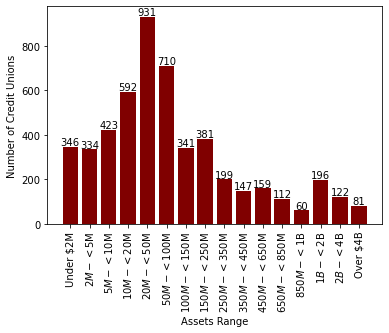

In [20]:
## Plot number of credit unions in each category

plt.bar(cu_count.index, cu_count, color='maroon')
plt.xlabel('Assets Range')
plt.ylabel('Number of Credit Unions')
for index, value in enumerate(cu_count):
    plt.text(index, value + 7, str(value), ha='center')
plt.xticks(rotation=90)
plt.show()

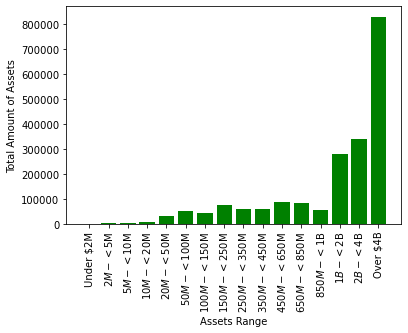

In [21]:
## Plot total amount of asset for each category

plt.bar(cu_assets_sum.index, cu_assets_sum, color='green')
plt.xlabel('Assets Range')
plt.ylabel('Total Amount of Assets')
plt.xticks(rotation=90)
plt.show()

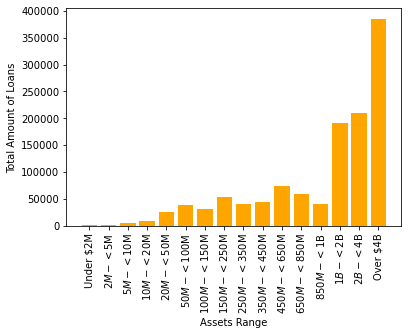

In [22]:
## Plot total amount of loan for each category

plt.bar(cu_loans.index, cu_loans, color='orange')
plt.xlabel('Assets Range')
plt.ylabel('Total Amount of Loans')
plt.xticks(rotation=90)
plt.show()

Looking at the three charts, we could see that the most crowded category is $20M -  $50M with 931 credit unions. The number of credit unions with assets over $4B is quite a few, but they hold the largest amount of total assets and loans.